In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Beyond 1

Rather than starting with data from Chicago, start with an empty data frame, and use a `for` loop to load data from all three cities.

In [2]:
df = DataFrame()

all_dfs = []

for city_stem in ['chicago,il', 'los+angeles,ca', 'boston,ma']:
    new_df = pd.read_csv(f'../data/{city_stem}.csv', 
                 usecols=[0, 1,2],
                 header=0,
                 names=['date_time','maxtemp', 'mintemp'],
                parse_dates=['date_time'],
                index_col=['date_time'])
    new_df['city'] = city_stem.split(',')[0].replace('+', ' ').title()
    all_dfs.append(new_df)

df = pd.concat(all_dfs)
df.head()

,maxtemp,mintemp,city
date_time,,,
2018-12-11 00:00:00,1,-2,Chicago
2018-12-11 03:00:00,1,-2,Chicago
2018-12-11 06:00:00,1,-2,Chicago
2018-12-11 09:00:00,1,-2,Chicago
2018-12-11 12:00:00,1,-2,Chicago


# Beyond 2

For each city, calculate the mean and median for `mintemp` and `maxtemp`. Are they the same (or even close)? If they're different, in which direction were they pulled?

In [3]:
df.groupby('city')[['mintemp', 'maxtemp']].agg(['mean', 'median'])

mintemp           maxtemp       
                  mean median       mean median
city                                           
Boston       -3.142857   -3.0   2.868132    2.0
Chicago      -5.076923   -4.0  -0.736264    0.0
Los Angeles  10.637363   11.0  17.054945   16.0

# Beyond 3

Create a line plot showing the minimum temperatures in each city. The x axis should show dates, the y axis should show temperatures, and each line should represent a different city.

city
Boston         Axes(0.125,0.11;0.775x0.77)
Chicago        Axes(0.125,0.11;0.775x0.77)
Los Angeles    Axes(0.125,0.11;0.775x0.77)
Name: mintemp, dtype: object

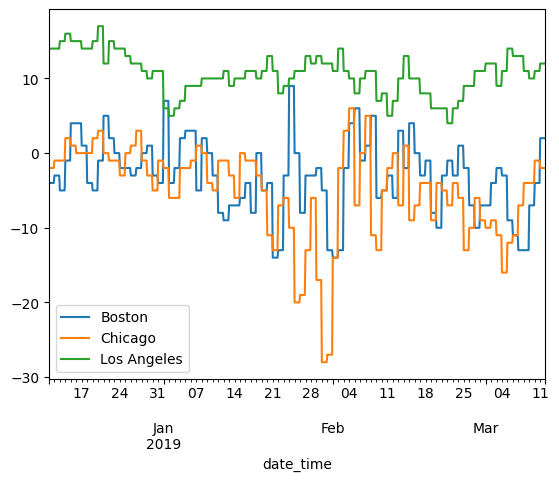

In [4]:
df.groupby('city')['mintemp'].plot.line(legend=True)